In [7]:
import os
from tqdm import tqdm

In [16]:
PASS_LOG = r'/data2/zhangzheng1/data/code/exiv2-0.26/PASS_LOG'
CMP_CALLS = ["strcmp", "strncmp", "strcasecmp", "strncasecmp", "memcmp"]

In [133]:
funcSet = set() # 全部函数
func2cmp = {} # 函数f：f调用的全部cmp函数 1:n
func2blk = {} # 函数f：f的全部IR基本块 1:n
blk2call = {} # 函数f + 基本块b：b中调用的全部函数 1:n
func2call = {} # 函数f：f调用的全部函数 1:n
curFunc = None
curBB = None
for f in tqdm(os.listdir(PASS_LOG)):
    with open(os.path.join(PASS_LOG, f), 'r') as fp:
        lines = fp.readlines()
        for line in lines:
            line = line[:-1] # 去掉末尾的\n
            if '[F] ' in line:
                funcName = line[4:]
                if funcName not in funcSet:
                    funcSet.add(funcName) # funcSet
                curFunc = funcName
            elif '[BB] ' in line:
                bbName = line[5:]
                if curFunc not in func2blk:
                    func2blk[curFunc] = []
                func2blk[curFunc].append(bbName) # func2blk
                curBB = curFunc + '|' + bbName
            elif '[BBC] ' in line:
                bbCallFuncName = line[6:]
                if curBB not in blk2call:
                    blk2call[curBB] = []
                blk2call[curBB].append(bbCallFuncName) # blk2call
                if curFunc not in func2call:
                    func2call[curFunc] = []
                func2call[curFunc].append(bbCallFuncName) # func2call
            elif any([n in line for n in CMP_CALLS]):
                if curFunc not in func2cmp:
                    func2cmp[curFunc] = []
                func2cmp[curFunc].append(line) # func2cmp
            else:
#                 raise Exception("[!] {}".format(line))
                print("[!] {} {} {} {}".format(f, curFunc, curBB, line))

100%|██████████| 71/71 [00:00<00:00, 738.71it/s]


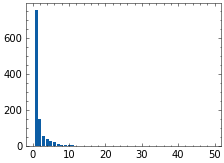

In [134]:
import matplotlib.pyplot as plt
from collections import Counter
with plt.style.context(['science', 'no-latex']):
    a = Counter([len(func2call[f]) for f in func2call])
    plt.bar(a.keys(), a.values())
    plt.show()

In [135]:
nonCallFuncSet = funcSet - set(func2call) # 不调用其它函数的函数集合

In [136]:
func2cov = {} # 函数f：从f出发可以到达的最大IR基本块数量
for i,nf in enumerate(nonCallFuncSet): # 加入IR叶函数
    assert nf not in func2cov
    func2cov[nf] = len(func2blk.get(nf, []))

In [ ]:
def getFuncCov(f, s):
    pass

In [139]:
for f in func2call:
    tmps = set()
    res = len(func2blk[f])
    tmps.add(f)
    for c in func2call[f]:
        

{'_ZN8XMPUtils14ConvertFromIntElPKcPS1_Pm': 3,
 '_ZN5Exiv28Internal10TiffCopierC2EPNS0_13TiffComponentEjPKNS0_14TiffHeaderBaseEPKSt6vectorINS0_5IfdIdESaIS8_EE': 7,
 '_ZN5Exiv28Internal14CanonMakerNote13printSi0x0016ERSoRKNS_5ValueEPKNS_8ExifDataE': 10,
 '_ZN5Exiv28Internal19newTiffBinaryArray0IXadL_ZNS0_10nikonIiCfgEEELi5EL_ZNS0_10nikonIiDefEEEESt8auto_ptrINS0_13TiffComponentEEtNS0_5IfdIdE': 3,
 '_ZN12_GLOBAL__N_113LoaderXmpJpegD0Ev': 3,
 '_ZN5Exiv28Internal8printTagILi3EL_ZNS0_14exifSaturationEEEERSoS2_RKNS_5ValueEPKNS_8ExifDataE': 6,
 '_GLOBAL__sub_I_sigmamn.cpp': 1,
 '_ZN12TXMPIteratorINSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEEEC2ERK8TXMPMetaIS5_EPKcSC_m': 3,
 '_ZN5Exiv28Internal8printTagILi3EL_ZNS0_23nikonAutoBracketReleaseEEEERSoS2_RKNS_5ValueEPKNS_8ExifDataE': 6,
 '_ZN12_GLOBAL__N_112parseEscapesERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE': 111,
 '_GLOBAL__sub_I_actions.cpp': 1,
 '_ZN5Exiv28Internal14TiffHeaderBase4readEPKhj': 7,
 '_ZN9TXMPUtilsINSt7__cxx111